In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib_inline
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.font_manager as fm
from collections import Counter

In [3]:
from konlpy.tag import Mecab

In [4]:
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


In [6]:
df1 = pd.read_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_2022-02-09~2022-02-16_result.csv',encoding='utf-8')
df2 = pd.read_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_2022-02-16~2022-02-23_result.csv',encoding='utf-8')
df3 = pd.read_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_2022-02-23~2022-03-02_result.csv',encoding='utf-8')
df4 = pd.read_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_2022-03-02~2022-03-09_result.csv',encoding='utf-8')

In [7]:
df = pd.read_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_2022-02-09~2022-03-09_result.csv',encoding='utf-8')

### 긍정, 부정 분포 확인

In [8]:
dfs = [df1, df2, df3, df4]

In [9]:
n=1
for i in dfs:
    print('{}주차 ㅇㅅㄹ 데이터 개수: {}'.format(n, len(i['text'])))
    n = n+1

1주차 ㅇㅅㄹ 데이터 개수: 66
2주차 ㅇㅅㄹ 데이터 개수: 105
3주차 ㅇㅅㄹ 데이터 개수: 74
4주차 ㅇㅅㄹ 데이터 개수: 137


In [10]:
#긍정 1, 부정 0
print('2022-02-09~2022-02-16 긍정 리뷰 갯수: {}'.format(df1['label'].value_counts()[1]))
print('2022-02-09~2022-02-16 부정 리뷰 갯수: {}'.format(df1['label'].value_counts()[0]))
print('2022-02-16~2022-02-23 긍정 리뷰 갯수: {}'.format(df2['label'].value_counts()[1]))
print('2022-02-16~2022-02-23 부정 리뷰 갯수: {}'.format(df2['label'].value_counts()[0]))
print('2022-02-23~2022-03-02 긍정 리뷰 갯수: {}'.format(df3['label'].value_counts()[1]))
print('2022-02-23~2022-03-02 부정 리뷰 갯수: {}'.format(df3['label'].value_counts()[0]))
print('2022-03-02~2022-03-09 긍정 리뷰 갯수: {}'.format(df4['label'].value_counts()[1]))
print('2022-03-02~2022-03-09 부정 리뷰 갯수: {}'.format(df4['label'].value_counts()[0]))

2022-02-09~2022-02-16 긍정 리뷰 갯수: 22
2022-02-09~2022-02-16 부정 리뷰 갯수: 44
2022-02-16~2022-02-23 긍정 리뷰 갯수: 34
2022-02-16~2022-02-23 부정 리뷰 갯수: 71
2022-02-23~2022-03-02 긍정 리뷰 갯수: 18
2022-02-23~2022-03-02 부정 리뷰 갯수: 56
2022-03-02~2022-03-09 긍정 리뷰 갯수: 29
2022-03-02~2022-03-09 부정 리뷰 갯수: 108


### 긍정, 부정 분포 확인

In [11]:
pos = []
for i in dfs:
    if i['label'].value_counts()[1]:
        pos.append(i['label'].value_counts()[1])
neg = []
for i in dfs:
    if i['label'].value_counts()[0]:
        neg.append(i['label'].value_counts()[0])

<AxesSubplot:title={'center':'ㅇㅅㄹ 주차별 레이블 분포'}>

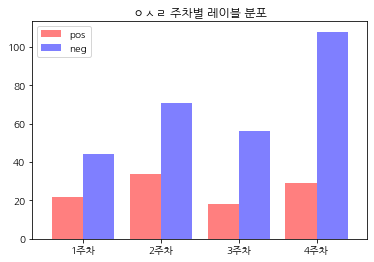

In [12]:
label = ['1주차', '2주차', '3주차', '4주차']
week = pd.DataFrame({'pos':pos, 'neg':neg}, index=label)
week.plot.bar(color=['r', 'b'], width=0.8, title='ㅇㅅㄹ 주차별 레이블 분포', alpha=0.5, rot=0)

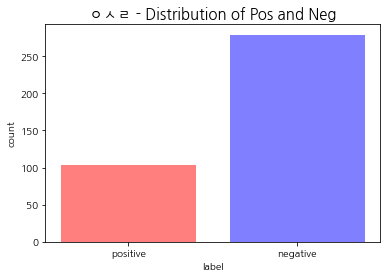

In [13]:
# 전체 데이터 분포 확인
def posNneg(df):
    label = ['positive', 'negative']
    index =  np.arange(len(df['label']))
    value = [df['label'].value_counts()[1], df['label'].value_counts()[0]]
    plt.bar(label, value, color=['r', 'b'], alpha=0.5)
    plt.title('ㅇㅅㄹ - Distribution of Pos and Neg', fontsize=15)
    plt.xlabel('label')
    plt.ylabel('count')
    plt.show()
posNneg(df)

### 전처리 코드

In [14]:
# Preprocessing code with Mecab
#dicpath="/usr/local/lib/mecab/dic/mecab-ko-dic"
mecab = Mecab(r"C:/mecab/mecab-ko-dic") # Mecab User Dic Path

def preprocessing_mecab(readData):
      
    #### Tokenize
    morphs = mecab.pos(readData)
    
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    
    # Remove JOSA, EOMI, etc
    morphs[:] = (morph for morph in morphs if morph[1] not in JOSA+SIGN+TERMINATION+SUPPORT_VERB)
        
    # Remove length-1 words  
    morphs[:] = (morph for morph in morphs if not (len(morph[0]) == 1))
    
    # Remove Numbers
    #morphs[:] = (morph for morph in morphs if morph[1] not in NUMBER)
   
    # Result pop-up
    result = []
    for morph in morphs:
        result.append(morph[0])
        
    return result

### 전체 텍스트 단어 빈도수 및 워드클라우드 생성

In [15]:
text = [' '.join(preprocessing_mecab(t)) for t in df['text']]
m_tokenized = df['text'].apply(lambda x: preprocessing_mecab(x))

In [16]:
# 불용어 리스트 생성
stop_words = pd.read_csv('./한국어불용어100.txt', sep = "\t", engine='python')
stop_words = list(stop_words["word"])

In [17]:
# 동일 초성 및 의미없는 단어 리스트 생성, ㅇㅅㄹ는 키워드이기 때문에 제외
same = ['ㅇㅈㅁ이', 'ㅇㅈㅁ을', 'ㅇㅈㅁ도', 'ㅇㅈㅁ은', 'ㅇㅈㅁ의']
same2 = ['ㅇㅅㅇ이', 'ㅇㅅㅇ은']
same3 = ['ㅇㅅㄹ은', 'ㅇㅅㄹ이', 'ㅇㅅㄹ커', 'ㅇㅅㄹ이는', 'ㅇㅅㄹ의', 'ㅇㅅㄹ이랑']
stopwords = ['ㅇㄴ', 'ㅇㄹ', 'ㅇㄷ', 'ㅇㅅㅇ', 'ㅇㅇㅇ', 'ㅍㅅ', 'ㅎㅎ', 'ㅊㅎㅈㄱ', 'ㅇㅇ', 'ㅇㅅ', 'ㅇㅌ', '그렇', '그리고','ㅇㅅㄹ', '나오','이번', '때문', '그러', '그런', '진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거','한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','그냥', '한다는', '해서', '인데', '라면', '만들', '라니']
stopwords = stopwords+stop_words

In [18]:
# 단어 빈도수 그래프 만들기
n_corpus = []
def word_frequency(m_tokenzied):  
    #n_corpus = [] 
    for t in m_tokenized:
        for j in t:
            if j in same:
                j = 'ㅇㅈㅁ'
            elif j in same2:
                j = 'ㅇㅅㅇ'
            elif j in same3:
                j = 'ㅇㅅㄹ'
            if j not in stopwords:
                n_corpus.append(j)

    count = Counter(n_corpus) 
    most = count.most_common() #빈도 수 순으로 추출 
    x, y= [], [] 
    for word,count in most[:40]: 
        x.append(word) 
        y.append(count)
    #plt.rc('font',family='NanumGothic.ttf')
    plt.rcParams['font.family'] = "NanumGothic"
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10,10)) 
    sns.barplot(x=y,y=x)

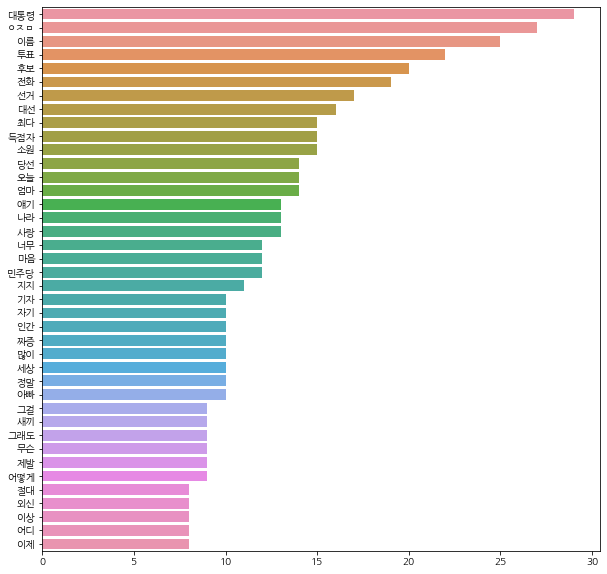

In [19]:
# 전체 텍스트 단어 빈도수
word_frequency(m_tokenized)

In [20]:
def make_wordcloud(m_tokenized): 
    temp = []
    for t in m_tokenized:
        for j in t:
            if j in same:
                j = 'ㅇㅈㅁ'
            elif j in same2:
                j = 'ㅇㅅㅇ'
            elif j in same3:
                j = 'ㅇㅅㄹ'
            if j not in stopwords:
                temp.append(j)
                    
    font_path = 'C:/Users/Erin/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf'
    wordcloud = WordCloud(font_path=font_path,
                background_color="black",
                stopwords=stopwords, 
                max_words=100, 
                #max_font_size=50, 
                width=500,
                height=500,
                random_state=1,
                scale=2).generate(' '.join(temp))
    fig = plt.figure(1, figsize=(8,8)) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('on')
    plt.show()   
        

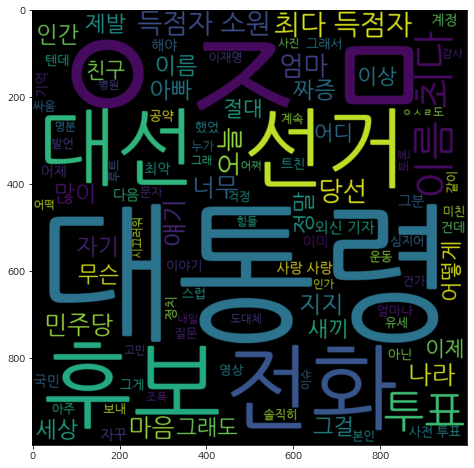

In [21]:
# 전체 텍스트 워드 클라우드
make_wordcloud(m_tokenized)

### 주차별 단어 빈도수 & 워드 클라우드 생성

In [22]:
# 단어 빈도수용 전처리된 string 요소 리스트 만들기
df1_text = [' '.join(preprocessing_mecab(t)) for t in df1['text']]
df2_text = [' '.join(preprocessing_mecab(t)) for t in df2['text']]
df3_text = [' '.join(preprocessing_mecab(t)) for t in df3['text']]
df4_text = [' '.join(preprocessing_mecab(t)) for t in df4['text']]

In [23]:
# 워드 클라우드용 전처리 및 토큰화된 리스트 만들기
df1_tokenized1 = df1['text'].apply(lambda x: preprocessing_mecab(x))
df2_tokenized2 = df2['text'].apply(lambda x: preprocessing_mecab(x))
df3_tokenized3 = df3['text'].apply(lambda x: preprocessing_mecab(x))
df3_tokenized4 = df4['text'].apply(lambda x: preprocessing_mecab(x))

In [24]:
dfs_text = [df1_text,df2_text,df3_text, df4_text]
dfs_tokenized = [df1_tokenized1, df2_tokenized2, df3_tokenized3, df3_tokenized4]

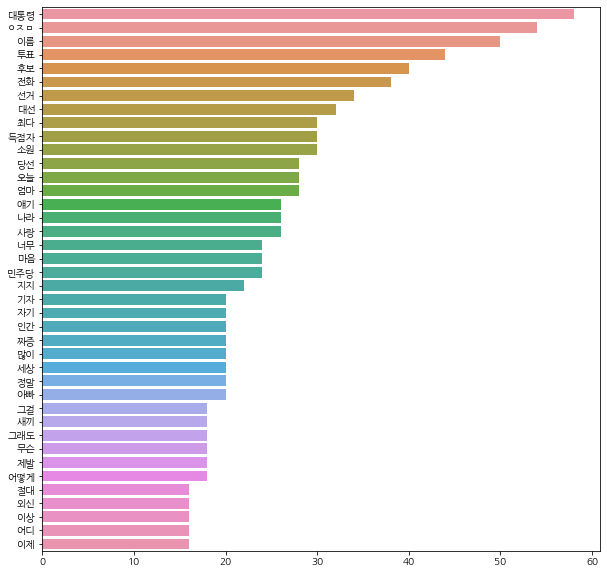

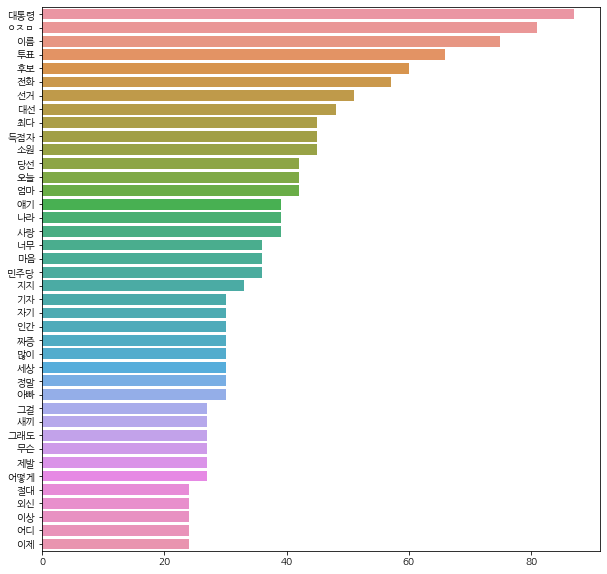

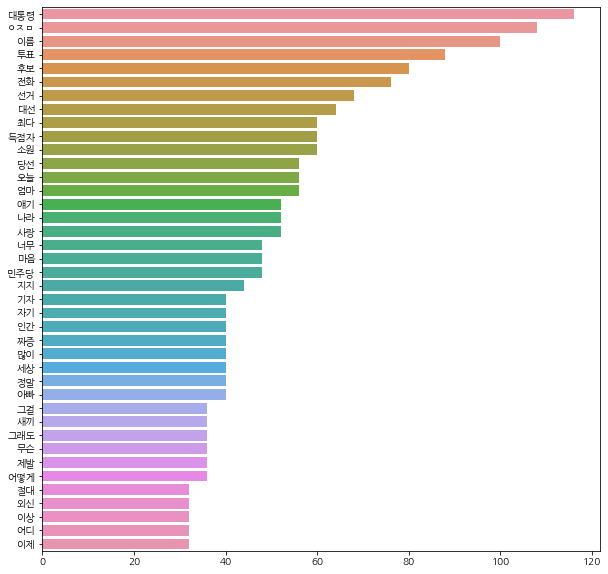

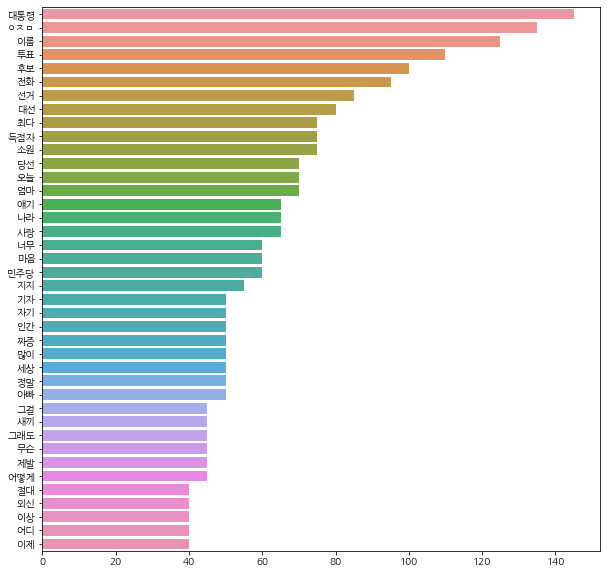

In [25]:
# 주차별 단어 빈도수 생성
for i in dfs_tokenized:
    word_frequency(i)

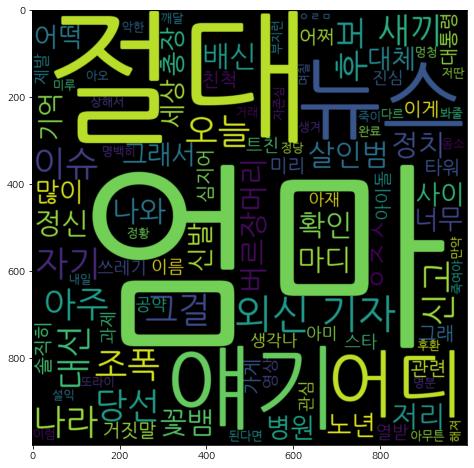

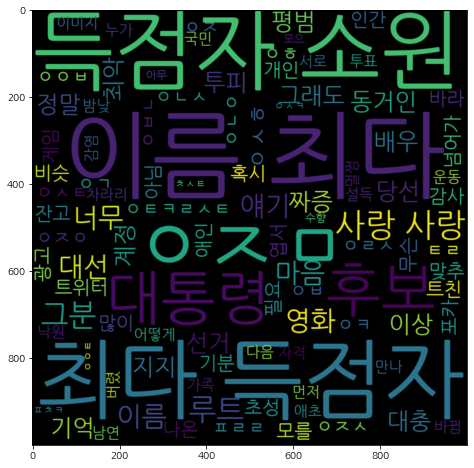

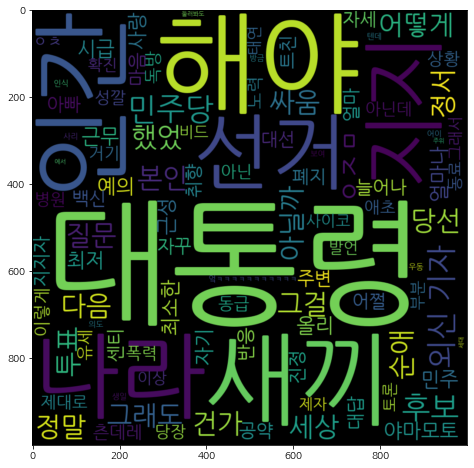

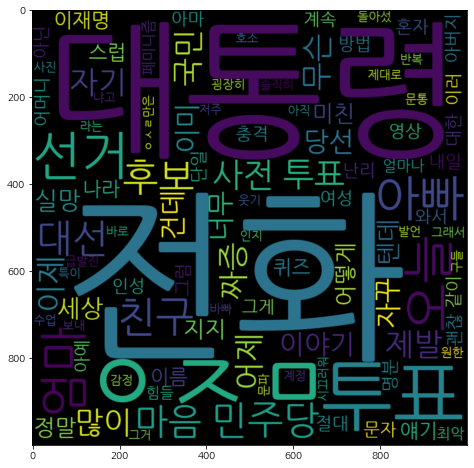

In [26]:
# 주차별 워드 클라우드 생성
for i in dfs_tokenized:
    make_wordcloud(i)

### 날짜별 최다 빈도 단어 추출

In [27]:
df['tokenized'] = df['text'].apply(lambda x: preprocessing_mecab(x))
df['tokenized'] = df['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [28]:
# 동일 단어 처리 후 새 tokenized 열 만들기
new = []
for i in df['tokenized']:
    n_corpus = [] 
    for j in i:
        if j in same:
            j = 'ㅇㅈㅁ'
        elif j in same2:
            j = 'ㅇㅅㅇ'
        elif j in same3:
            j = 'ㅇㅅㄹ'
        n_corpus.append(j)
    new.append(n_corpus)

df['tokenized'] = new
           

c:\Users\Erin\anaconda3\envs\torch1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


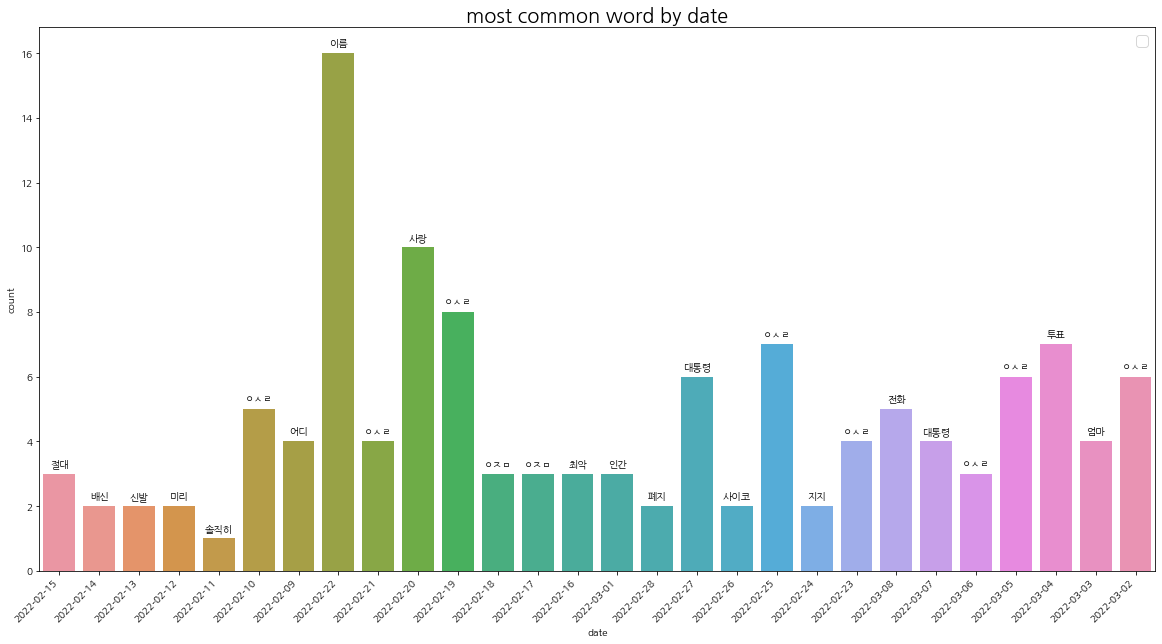

In [29]:
def common_words(words, k):
    c = Counter(words)
    cw = c.most_common(k)
    return c, cw

def add_value_labels(ax, df, spacing=5):
    for idx, rect in enumerate(ax.patches):
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{0}".format(df['word'][idx])

        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)

# 날짜별 가장 많이 언급된 단어와 단어의 갯수를 dict형태로 가져와서 dataframe으로 만들어주는 과정
date = []
word_list = []
count_list = []

for i in df['Datetime'].unique():
    tokenizing = sum(df[df['Datetime'] == i]['tokenized'],[])
    #print(tokenizing)
    c, cw = common_words(tokenizing, 1) 
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)
    
dateworddict = {'date' : date, 'word' : word_list, 'count' : count_list}
daily_df = pd.DataFrame(dateworddict, columns=['date', 'word', 'count'])

# graph
fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(daily_df['date'], daily_df['count'])
add_value_labels(ax, daily_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common word by date', fontsize=20)
plt.legend(fontsize=15)
#plt.save_fig("most common word by date")

### 해시태그 추출하기

In [30]:
# 정규표현식으로 #과 함께 있는 단어 추출
import re
p = re.compile('[#]+[0-9a-zA-Z_ㄱ-ㅎ가-힣]+')
hash = []
for i in df['text']:
    hash.extend(p.findall(i))

In [31]:
# 해시태그 빈도수 확인
from collections import Counter
Counter(hash).most_common()

[('#자캐', 15),
 ('#이재명', 2),
 ('#BTSArmy', 1),
 ('#BestFanArmy', 1),
 ('#iHeartAwards', 1),
 ('#자캐이름최다득점자소원', 1),
 ('#본사람다하기', 1),
 ('#자신의', 1),
 ('#자캐는', 1),
 ('#동거인에게', 1),
 ('#마음함', 1),
 ('#난', 1),
 ('#내가만드는퀴즈', 1),
 ('#퀴즈바이미', 1)]

In [32]:
def hashtag(wordInfo):
        Sorted_Dict_Values = sorted(wordInfo.values(), reverse=False)
        Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=False)
        plt.figure(figsize=(20, 10))
        plot = sns.barplot(Sorted_Dict_Keys, Sorted_Dict_Values)
        plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
        plt.title('most common hashtag', fontsize=20)
        plt.legend(fontsize=15)

c:\Users\Erin\anaconda3\envs\torch1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


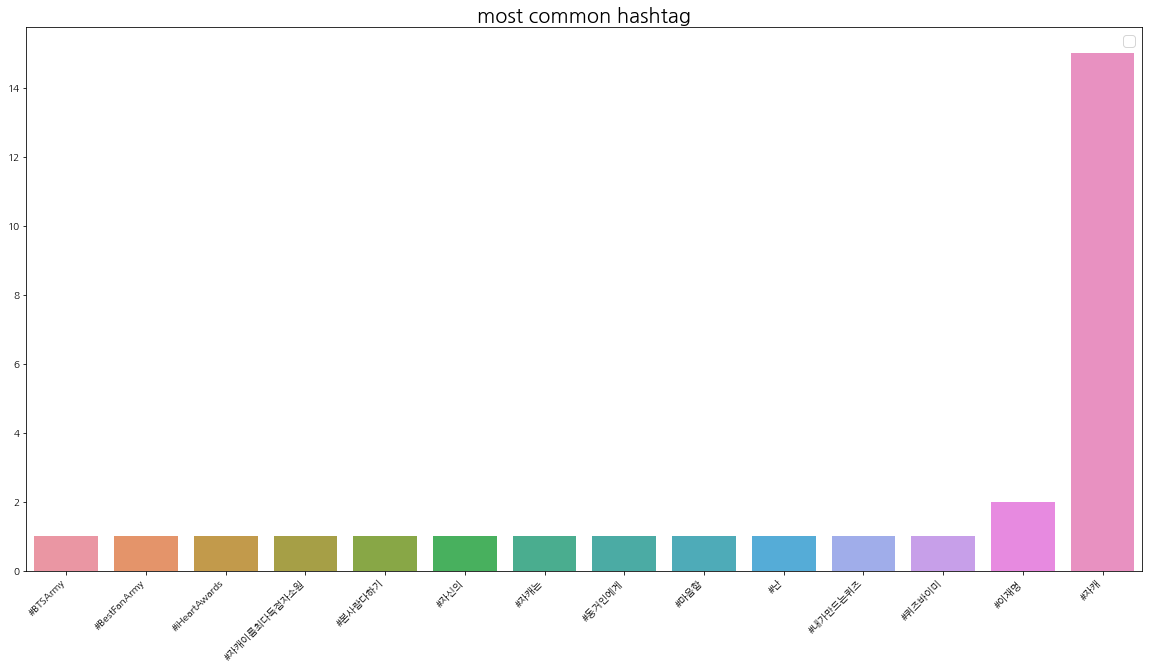

In [33]:
count = dict(Counter(hash).most_common(40))           
hashtag(count)